In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
import glob
import os
import pandas as pd

In [2]:
# read all files

folder_name = 'data'
file_type = 'csv'
seperator =','
df = pd.concat([pd.read_csv(f, sep=seperator) for f in glob.glob(folder_name + "/*."+file_type)],ignore_index=True)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49312 entries, 0 to 49311
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  49312 non-null  object 
 1   Actiwatch activity counts  49100 non-null  float64
 2   Actiware classification    48919 non-null  float64
 3   Apple Watch ENMO           49278 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB
None


In [4]:
# Data clearning
# drop NaN vaules

df.dropna(subset=['Actiwatch activity counts','Actiware classification', 'Apple Watch ENMO'], inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48909 entries, 15 to 49310
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  48909 non-null  object 
 1   Actiwatch activity counts  48909 non-null  float64
 2   Actiware classification    48909 non-null  float64
 3   Apple Watch ENMO           48909 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.9+ MB
None


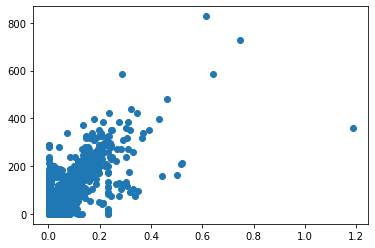

In [5]:
#Selecte independent and dependent variable
# X is independent---ENMO
# y is dependent---Actiwatch activity counts

X =df.iloc[:,3].values.reshape(-1, 1)
y=df.iloc[:,1].values.reshape(-1, 1)

plt.scatter(X, y)
plt.show()

In [6]:
# set training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:
# build Polynomial Regression model (due to Simple Linear Regression can will get lower Score and Accuracy)
# PolynomialFeatures set as 4 can obtain the better Score and Accuracy

regressor = make_pipeline(PolynomialFeatures(4), LinearRegression())
regressor.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [8]:
# performance of Polynomial Regression model
# get score and Accuracy

score = regressor.score(X_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

Score:  0.7297029822636146
Accuracy: 72.97029822636146%


In [9]:
# Use the trained regression model to predict the value of the testing dataset

y_pred = regressor.predict(X_test)
Apple_activity_counts=y_pred
print('Predict : ', Apple_activity_counts)

Predict :  [[13.50918726]
 [-0.48079096]
 [-2.36704234]
 ...
 [ 3.19215472]
 [ 0.72702847]
 [ 3.08638664]]


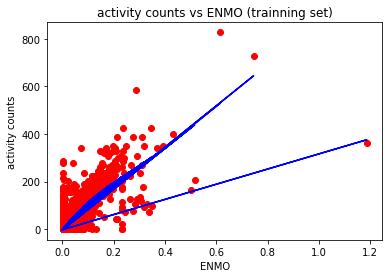

In [10]:
# polt the training set

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('activity counts vs ENMO (trainning set)')
plt.xlabel("ENMO")
plt.ylabel("activity counts")
plt.show()

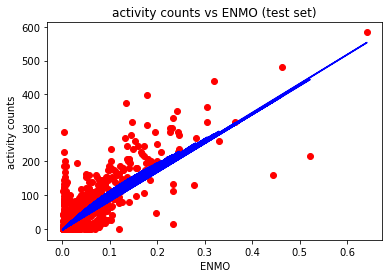

In [11]:
# polt the training set

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('activity counts vs ENMO (test set)')
plt.xlabel("ENMO")
plt.ylabel("activity counts")
plt.show()

In [12]:
# Use the trained regression model to predict the activity count values of ENMO
Apple_pred = regressor.predict(X)

# save the predict the values to df
df['Apple_pred'] = Apple_pred
print(df)

                 timestamp  Actiwatch activity counts  \
15           1/1/2000 1:20                        0.0   
16           1/1/2000 1:21                       24.0   
17           1/1/2000 1:21                        3.0   
18           1/1/2000 1:21                        0.0   
19           1/1/2000 1:21                        3.0   
...                    ...                        ...   
49306  28/01/2000 08:56:30                      113.0   
49307  28/01/2000 08:56:45                       79.0   
49308  28/01/2000 08:57:00                       88.0   
49309  28/01/2000 08:57:15                       73.0   
49310  28/01/2000 08:57:30                      208.0   

       Actiware classification  Apple Watch ENMO  Apple_pred  
15                         1.0          0.007234    5.940796  
16                         1.0          0.030109   35.738614  
17                         1.0          0.008785    8.050580  
18                         1.0          0.007893    6.839463  
